In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import plotly.express as px
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

DSC 640
Nicolas Saenz
Milestone 5

In [5]:
df = pd.read_excel('nationaldatabaseofchildcareprices.xlsx')

Median household income MHI_2018
Poerty rate all families PR_F
MEdian price of center based care up to 5 months MCBto5
MC6to11 
MC12to17


Text(0, 0.5, 'Frequency')

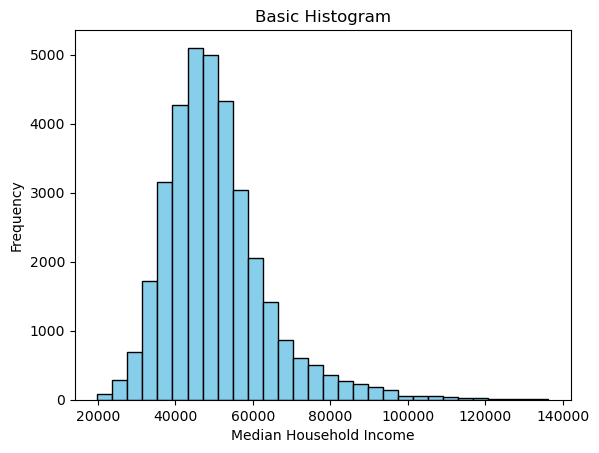

In [7]:
# Basic histogram
plt.figure()
plt.hist(df["MHI_2018"], bins=30, color='skyblue', edgecolor='black')
plt.title('Basic Histogram')
plt.xlabel('Median Household Income')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

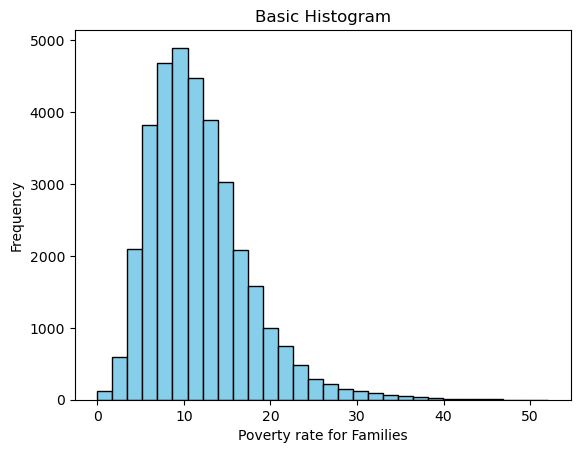

In [8]:
# Basic histogram
plt.figure()
plt.hist(df["PR_F"], bins=30, color='skyblue', edgecolor='black')
plt.title('Basic Histogram')
plt.xlabel('Poverty rate for Families')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

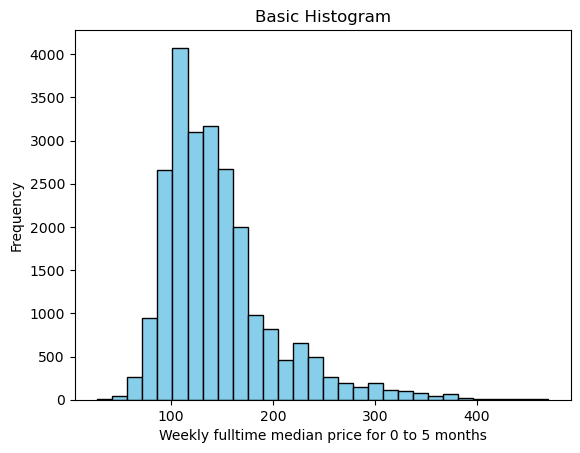

In [10]:
# Basic histogram
plt.figure()
plt.hist(df["MCBto5"], bins=30, color='skyblue', edgecolor='black')
plt.title('Basic Histogram')
plt.xlabel('Weekly fulltime median price for 0 to 5 months')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

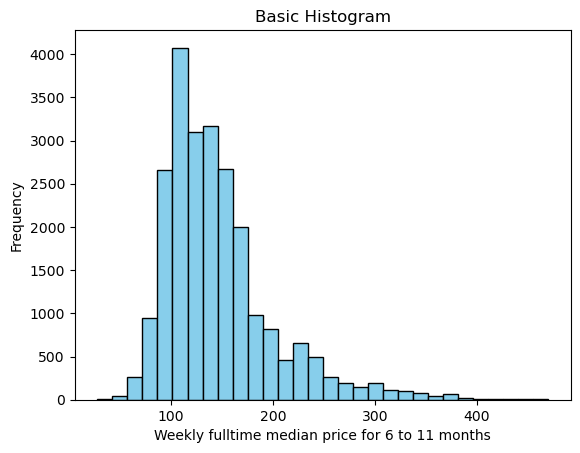

In [11]:
# Basic histogram
plt.figure()
plt.hist(df["MC6to11"], bins=30, color='skyblue', edgecolor='black')
plt.title('Basic Histogram')
plt.xlabel('Weekly fulltime median price for 6 to 11 months')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

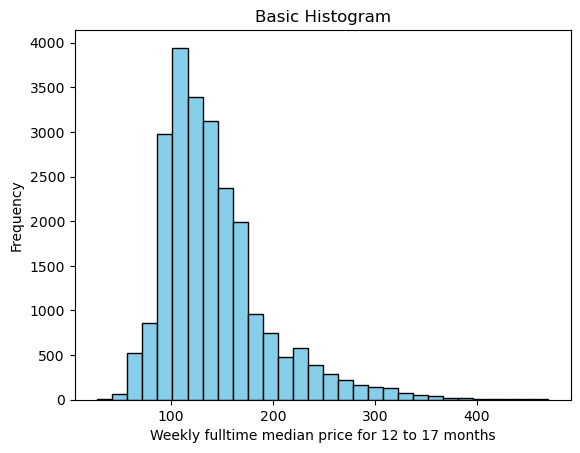

In [12]:


# Basic histogram
plt.figure()
plt.hist(df["MC12to17"], bins=30, color='skyblue', edgecolor='black')
plt.title('Basic Histogram')
plt.xlabel('Weekly fulltime median price for 12 to 17 months')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

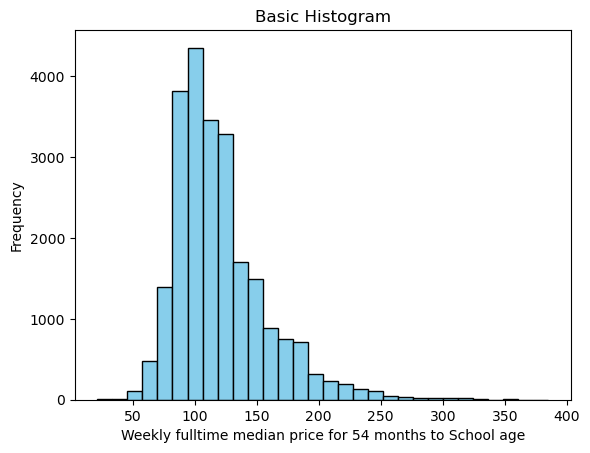

In [13]:


# Basic histogram
plt.figure()
plt.hist(df["MC54toSA"], bins=30, color='skyblue', edgecolor='black')
plt.title('Basic Histogram')
plt.xlabel('Weekly fulltime median price for 54 months to School age')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

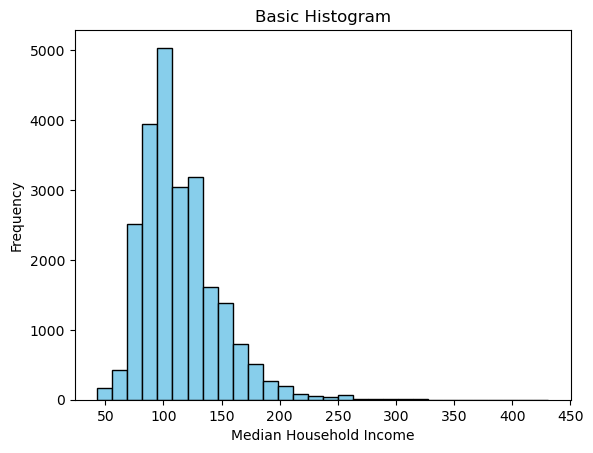

In [14]:


# Basic histogram
plt.figure()
plt.hist(df["MFCCInfant"], bins=30, color='skyblue', edgecolor='black')
plt.title('Basic Histogram')
plt.xlabel('Median Household Income')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

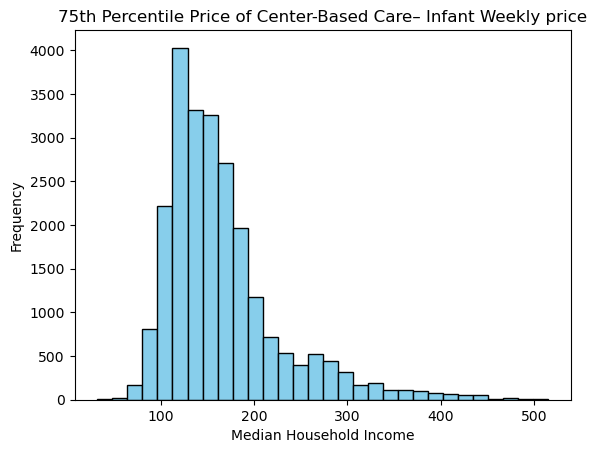

In [15]:


# Basic histogram
plt.figure()
plt.hist(df["_75CInfant"], bins=30, color='skyblue', edgecolor='black')
plt.title('75th Percentile Price of Center-Based Care– Infant Weekly price')

plt.xlabel('Median Household Income')
plt.ylabel('Frequency')

In [16]:
grouped_by_category = df.groupby('State_Name')


Average_Income_by_state = grouped_by_category['MHI_2018'].median().to_frame()
print("--- Average Quantity per Category (Median) ---")
print(Average_Income_by_state)
print(type(Average_Income_by_state))

--- Average Quantity per Category (Median) ---
                       MHI_2018
State_Name                     
Alabama               40483.520
Alaska                67913.765
Arizona               47779.500
Arkansas              38752.120
California            58854.580
Colorado              51933.150
Connecticut           76287.530
Delaware              60043.800
District of Columbia  71096.400
Florida               48173.000
Georgia               41886.440
Hawaii                70464.560
Idaho                 47121.960
Illinois              51733.900
Indiana               51390.390
Iowa                  52489.080
Kansas                49230.300
Kentucky              41752.060
Louisiana             43804.325
Maine                 49428.640
Maryland              72759.900
Massachusetts         69484.440
Michigan              46836.160
Minnesota             54625.020
Mississippi           36772.985
Missouri              43493.760
Montana               46340.280
Nebraska              502

In [17]:
# Group by 'State_Name', calculate the median, and convert the result to a DataFrame
average_income_by_state_df = df.groupby('State_Name')['MHI_2018'].median().reset_index()
print(average_income_by_state_df.columns)
print(type(average_income_by_state_df))


Index(['State_Name', 'MHI_2018'], dtype='object')
<class 'pandas.core.frame.DataFrame'>


In [18]:

Average_Yearly_cost_Bto5months = ((grouped_by_category['MCBto5'].median())*52).to_frame()
print(type(Average_Yearly_cost_Bto5months))


<class 'pandas.core.frame.DataFrame'>


In [31]:
# Group by 'State_Name', calculate the median, and convert the result to a DataFrame
Average_Yearly_cost_Bto5months_df = df.groupby('State_Name')['MCBto5'].median().reset_index()

print(Average_Yearly_cost_Bto5months_df.columns)

Index(['State_Name', 'MCBto5'], dtype='object')


In [33]:
#average_income_by_state_df["MHI_2018"] = average_income_by_state_df["MHI_2018"]*0.07

In [35]:
#Create a copy of income data and multiply the income column to find what the ncau deems as an affordable amount to spend for childcare

affordable_df = average_income_by_state_df.copy()
print(affordable_df)
affordable_df['MHI_2018'] = affordable_df['MHI_2018']*0.07

              State_Name   MHI_2018
0                Alabama  40483.520
1                 Alaska  67913.765
2                Arizona  47779.500
3               Arkansas  38752.120
4             California  58854.580
5               Colorado  51933.150
6            Connecticut  76287.530
7               Delaware  60043.800
8   District of Columbia  71096.400
9                Florida  48173.000
10               Georgia  41886.440
11                Hawaii  70464.560
12                 Idaho  47121.960
13              Illinois  51733.900
14               Indiana  51390.390
15                  Iowa  52489.080
16                Kansas  49230.300
17              Kentucky  41752.060
18             Louisiana  43804.325
19                 Maine  49428.640
20              Maryland  72759.900
21         Massachusetts  69484.440
22              Michigan  46836.160
23             Minnesota  54625.020
24           Mississippi  36772.985
25              Missouri  43493.760
26               Montana  46

In [37]:
print(affordable_df)

              State_Name    MHI_2018
0                Alabama  2833.84640
1                 Alaska  4753.96355
2                Arizona  3344.56500
3               Arkansas  2712.64840
4             California  4119.82060
5               Colorado  3635.32050
6            Connecticut  5340.12710
7               Delaware  4203.06600
8   District of Columbia  4976.74800
9                Florida  3372.11000
10               Georgia  2932.05080
11                Hawaii  4932.51920
12                 Idaho  3298.53720
13              Illinois  3621.37300
14               Indiana  3597.32730
15                  Iowa  3674.23560
16                Kansas  3446.12100
17              Kentucky  2922.64420
18             Louisiana  3066.30275
19                 Maine  3460.00480
20              Maryland  5093.19300
21         Massachusetts  4863.91080
22              Michigan  3278.53120
23             Minnesota  3823.75140
24           Mississippi  2574.10895
25              Missouri  3044.56320
2

merge these data sets on state

Explore quality, licensing reuirements

Make a side by side bar chart to compare median income vs yearly cost by state


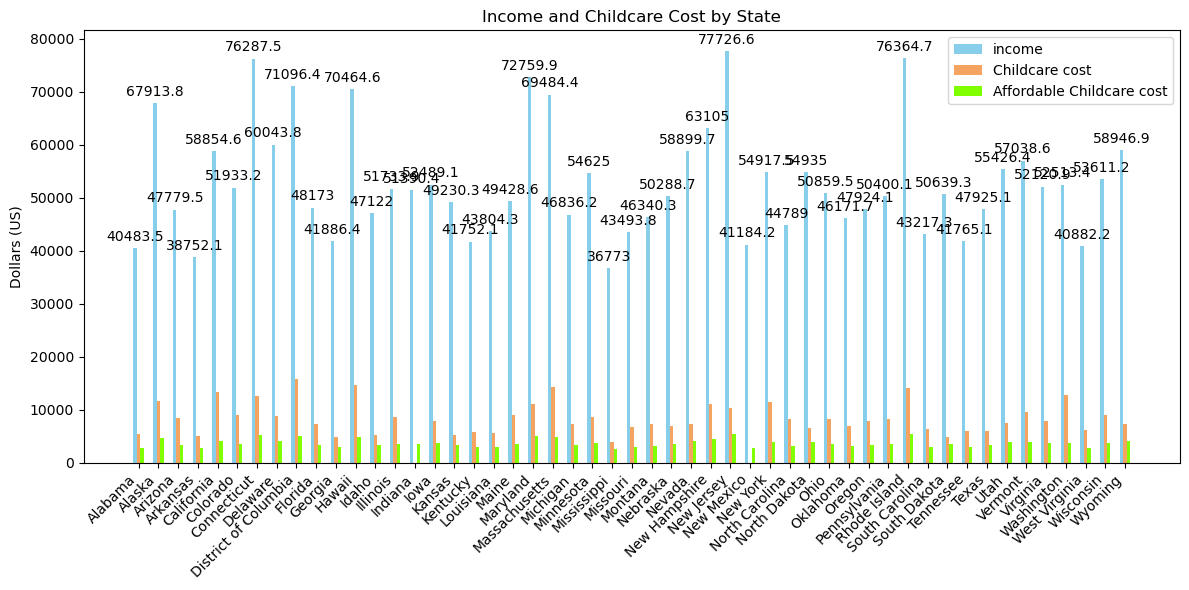

In [40]:
# --- 2. Prepare Data for Plotting ---
# Get the labels for the x-axis from the common 'quarter' column.
labels = average_income_by_state_df['State_Name']

# Get the values to plot from each DataFrame.
values1 = average_income_by_state_df['MHI_2018']
values2 = Average_Yearly_cost_Bto5months_df['MCBto5']*52
values3 = affordable_df['MHI_2018']

# Define the positions for the bars on the x-axis.
x = np.arange(len(labels)) * 2
width = 0.35  # the width of the bars


fig, ax = plt.subplots(figsize=(12, 6))

rects1 = ax.bar(x - width, values1, width, label='income', color='skyblue')

rects2 = ax.bar(x, values2, width, label='Childcare cost', color='sandybrown')

rects3 = ax.bar(x + width, values3, width, label='Affordable Childcare cost', color='chartreuse')


# Add Labels, Title, and Formatting
# Add some text for labels, title and axes ticks.
ax.set_ylabel('Dollars (US)')
ax.set_title('Income and Childcare Cost by State')

# Set the x-axis ticks 
ax.set_xticks(x)
ax.set_xticklabels(labels)
# Rotate the x-axis labels for better readability
ax.set_xticklabels(labels, rotation=45, ha='right')

ax.legend()

# Add labels 
ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)
#ax.bar_label(rects3, padding=3)

fig.tight_layout()
plt.show()


In [42]:
# Merge the two DataFrames using the 'state' column as the key
merged_df = pd.merge(Average_Yearly_cost_Bto5months_df, affordable_df, on='State_Name')

print(merged_df)

              State_Name   MCBto5    MHI_2018
0                Alabama  105.990  2833.84640
1                 Alaska  225.120  4753.96355
2                Arizona  161.500  3344.56500
3               Arkansas   97.500  2712.64840
4             California  258.145  4119.82060
5               Colorado  173.400  3635.32050
6            Connecticut  243.000  5340.12710
7               Delaware  171.020  4203.06600
8   District of Columbia  303.580  4976.74800
9                Florida  142.500  3372.11000
10               Georgia   95.000  2932.05080
11                Hawaii  281.250  4932.51920
12                 Idaho  101.880  3298.53720
13              Illinois  166.330  3621.37300
14               Indiana      NaN  3597.32730
15                  Iowa  150.130  3674.23560
16                Kansas   99.400  3446.12100
17              Kentucky  110.000  2922.64420
18             Louisiana  109.000  3066.30275
19                 Maine  173.000  3460.00480
20              Maryland  212.560 

In [44]:
# Introduce a new column calculating what child care costs for a year for a single child.
merged_df['Dollars Above Affordability'] = ((merged_df['MCBto5'])*52) - merged_df['MHI_2018']

print(merged_df)

              State_Name   MCBto5    MHI_2018  Dollars Above Affordability
0                Alabama  105.990  2833.84640                   2677.63360
1                 Alaska  225.120  4753.96355                   6952.27645
2                Arizona  161.500  3344.56500                   5053.43500
3               Arkansas   97.500  2712.64840                   2357.35160
4             California  258.145  4119.82060                   9303.71940
5               Colorado  173.400  3635.32050                   5381.47950
6            Connecticut  243.000  5340.12710                   7295.87290
7               Delaware  171.020  4203.06600                   4689.97400
8   District of Columbia  303.580  4976.74800                  10809.41200
9                Florida  142.500  3372.11000                   4037.89000
10               Georgia   95.000  2932.05080                   2007.94920
11                Hawaii  281.250  4932.51920                   9692.48080
12                 Idaho 

In [46]:

#care data is ranked on a scale of 1 to 4 1 besing the least and 4 being the most

df2 = pd.read_csv("Care Data(Sheet1).csv")

print(df2)

        State_Name  Quality  Availability
0      Connecticut        4             4
1    New Hampshire        3             4
2    Massachusetts        4             4
3     Rhode Island        3             4
4        Minnesota        4             3
5          Vermont        4             4
6         Maryland        3             4
7            Maine        3             4
8       New Jersey        1             4
9           Hawaii        4             1
10        Virginia        2             4
11         Wyoming        4             1
12        Delaware        1             4
13    Pennsylvania        3             3
14            Iowa        4             2
15    North Dakota        1             3
16        Colorado        2             3
17         Georgia        3             3
18         Florida        3             3
19        Missouri        3             2
20        Nebraska        1             2
21        Michigan        1             3
22       Wisconsin        1       

In [48]:
df2['Combined Qual and Aval Score'] = ((df2['Quality']) + df2['Availability']) / 2

In [50]:
print(df2)

        State_Name  Quality  Availability  Combined Qual and Aval Score
0      Connecticut        4             4                           4.0
1    New Hampshire        3             4                           3.5
2    Massachusetts        4             4                           4.0
3     Rhode Island        3             4                           3.5
4        Minnesota        4             3                           3.5
5          Vermont        4             4                           4.0
6         Maryland        3             4                           3.5
7            Maine        3             4                           3.5
8       New Jersey        1             4                           2.5
9           Hawaii        4             1                           2.5
10        Virginia        2             4                           3.0
11         Wyoming        4             1                           2.5
12        Delaware        1             4                       

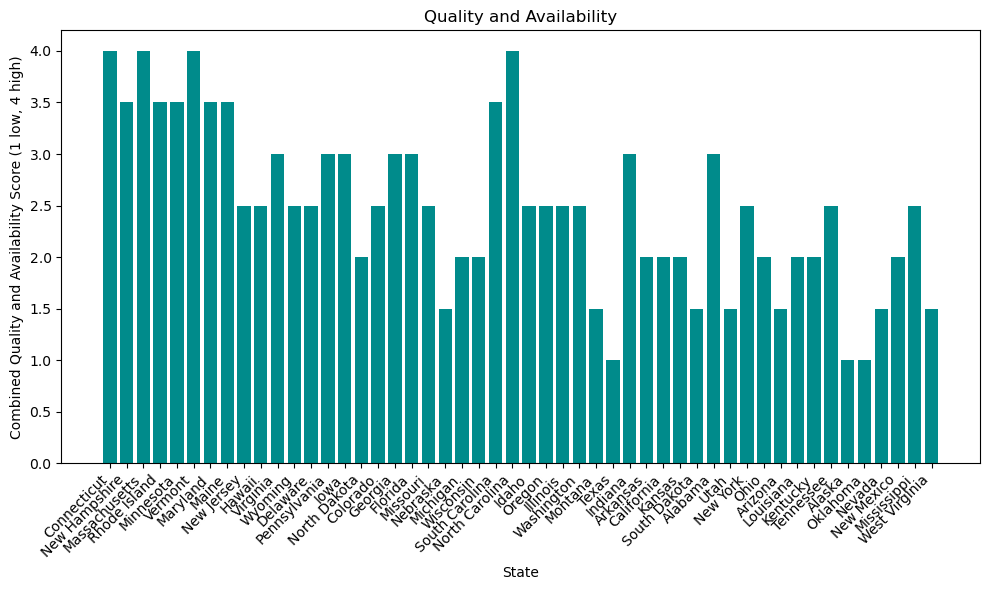

In [52]:
categories = df2['State_Name']
values = df2['Combined Qual and Aval Score']
colors = ['darkcyan']

plt.figure(figsize=(10, 6))
plt.bar(categories, values, color=colors)

x = np.arange(len(labels)) * 2

plt.title('Quality and Availability')
plt.xlabel('State')
plt.ylabel('Combined Quality and Availability Score (1 low, 4 high)')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

In [54]:
mean_value1 = merged_df['MCBto5'].mean()
mean_value2 = merged_df['Dollars Above Affordability'].mean()

In [56]:
# Replace missing values for new mexico and Indiana based on mean
merged_df['MCBto5'].fillna(mean_value1, inplace=True)
merged_df['Dollars Above Affordability'].fillna(mean_value2, inplace=True)

print(merged_df)

              State_Name      MCBto5    MHI_2018  Dollars Above Affordability
0                Alabama  105.990000  2833.84640                  2677.633600
1                 Alaska  225.120000  4753.96355                  6952.276450
2                Arizona  161.500000  3344.56500                  5053.435000
3               Arkansas   97.500000  2712.64840                  2357.351600
4             California  258.145000  4119.82060                  9303.719400
5               Colorado  173.400000  3635.32050                  5381.479500
6            Connecticut  243.000000  5340.12710                  7295.872900
7               Delaware  171.020000  4203.06600                  4689.974000
8   District of Columbia  303.580000  4976.74800                 10809.412000
9                Florida  142.500000  3372.11000                  4037.890000
10               Georgia   95.000000  2932.05080                  2007.949200
11                Hawaii  281.250000  4932.51920                

/var/folders/g9/dfcxkg0952scvgx9_4_jm4fc0000gn/T/ipykernel_73637/3607313228.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['MCBto5'].fillna(mean_value1, inplace=True)
/var/folders/g9/dfcxkg0952scvgx9_4_jm4fc0000gn/T/ipykernel_73637/3607313228.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

In [58]:
# merge our data by state on affordability, availibility and quality

merged_df2 = pd.merge(merged_df, df2, on='State_Name')
print(merged_df2)

        State_Name      MCBto5    MHI_2018  Dollars Above Affordability  \
0          Alabama  105.990000  2833.84640                  2677.633600   
1           Alaska  225.120000  4753.96355                  6952.276450   
2          Arizona  161.500000  3344.56500                  5053.435000   
3         Arkansas   97.500000  2712.64840                  2357.351600   
4       California  258.145000  4119.82060                  9303.719400   
5         Colorado  173.400000  3635.32050                  5381.479500   
6      Connecticut  243.000000  5340.12710                  7295.872900   
7         Delaware  171.020000  4203.06600                  4689.974000   
8          Florida  142.500000  3372.11000                  4037.890000   
9          Georgia   95.000000  2932.05080                  2007.949200   
10          Hawaii  281.250000  4932.51920                  9692.480800   
11           Idaho  101.880000  3298.53720                  1999.222800   
12        Illinois  166.3

In [60]:
# Select and Scale the Data
# Define the columns you want to use for clustering
columns_for_clustering = ['Quality', 'Availability', 'Dollars Above Affordability']
data_for_clustering = merged_df2[columns_for_clustering]

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it
scaled_data = scaler.fit_transform(data_for_clustering)

# Build the K-Means Model
# Note: You should determine the ideal number of clusters using the Elbow Method or Silhouette Score.
# We'll use k=4 as an example.
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=42)

# Fit the model to the SCALED data
kmeans.fit(scaled_data)

# View the Results
# Display the first few rows with the new 'Cluster' column
print(merged_df2.head())


   State_Name   MCBto5    MHI_2018  Dollars Above Affordability  Quality  \
0     Alabama  105.990  2833.84640                   2677.63360        4   
1      Alaska  225.120  4753.96355                   6952.27645        1   
2     Arizona  161.500  3344.56500                   5053.43500        2   
3    Arkansas   97.500  2712.64840                   2357.35160        3   
4  California  258.145  4119.82060                   9303.71940        2   

   Availability  Combined Qual and Aval Score  
0             2                           3.0  
1             1                           1.0  
2             1                           1.5  
3             1                           2.0  
4             2                           2.0  


In [ ]:
df_3d = pd.DataFrame(merged_df2, columns=['State_Name', 'Quality', 'Availability', 'Dollars Above Affordability'])

X = df_3d[['Quality', 'Availability', 'Dollars Above Affordability']]

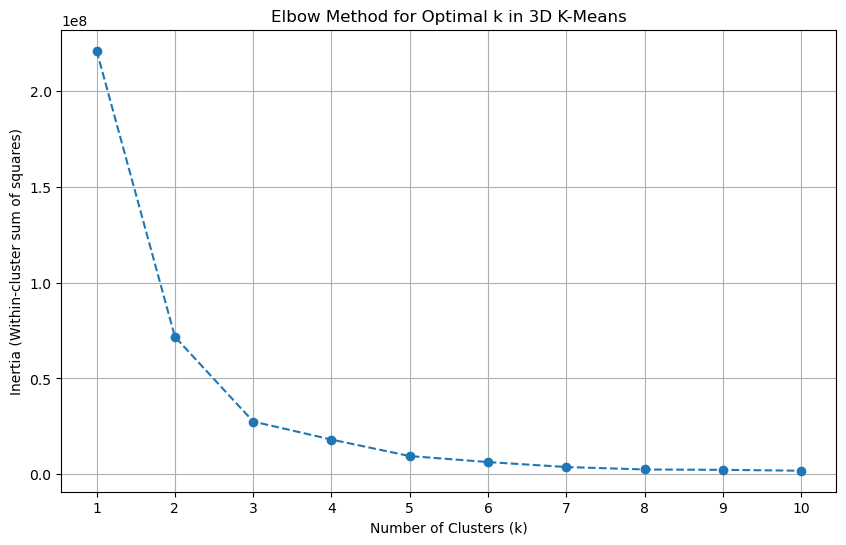

In [90]:

#Determine the best number of clusters for our model using the elbow method

#Calculate inertia for a range of cluster numbers
inertia_values = []
k_range = range(1, 11) # Test k from 1 to 10

for k in k_range:
    # Initialize and fit the KMeans model
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X)
    # Store the inertia for this value of k
    inertia_values.append(kmeans.inertia_)

#Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_values, marker='o', linestyle='--')

plt.title('Elbow Method for Optimal k in 3D K-Means')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [92]:

# Apply K-Means Clustering
kmeans_model = KMeans(
    n_clusters=4,
    init='k-means++',
    n_init='auto',
    random_state=42
)

In [128]:
print(df_3d)

        State_Name  Quality  Availability  Dollars Above Affordability  \
0          Alabama        4             2                  2677.633600   
1           Alaska        1             1                  6952.276450   
2          Arizona        2             1                  5053.435000   
3         Arkansas        3             1                  2357.351600   
4       California        2             2                  9303.719400   
5         Colorado        2             3                  5381.479500   
6      Connecticut        4             4                  7295.872900   
7         Delaware        1             4                  4689.974000   
8          Florida        3             3                  4037.890000   
9          Georgia        3             3                  2007.949200   
10          Hawaii        4             1                  9692.480800   
11           Idaho        4             1                  1999.222800   
12        Illinois        2           

In [126]:
# Fit the model without including labels
df_3d['cluster'] = kmeans_model.fit_predict(X)


# Visualize the 3D Clusters
fig = px.scatter_3d(
    df_3d,
    x='Quality',
    y='Availability',
    z='Dollars Above Affordability',
    color='cluster',
    text='State_Name',            
    hover_name='State_Name',      
    title="3D K-Means Clustering",
    labels={'cluster': 'Cluster ID'}
)

In [130]:
# Improve layout
fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=40) # Tighten the plot margins
)

fig.show()

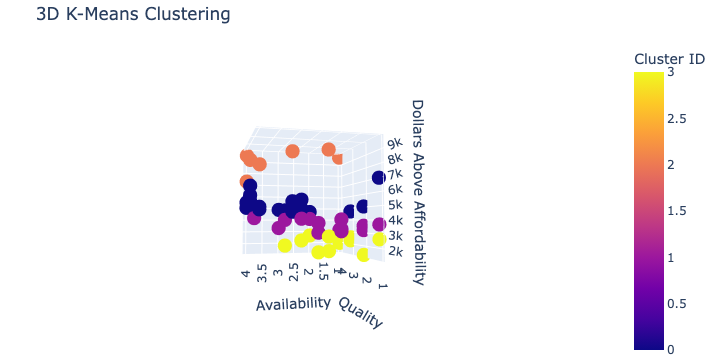

In [124]:
# Fit the model without including labels
df_3d['cluster'] = kmeans_model.fit_predict(X)


# Visualize the 3D Clusters
fig = px.scatter_3d(
    df_3d,
    x='Quality',
    y='Availability',
    z='Dollars Above Affordability',
    color='cluster',    
    title="3D K-Means Clustering",
    labels={'cluster': 'Cluster ID'}
)

# Improve layout
fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=40) # Tighten the plot margins
)

fig.show()

Points in original DataFrame: 50
Points after filtering for region: 6


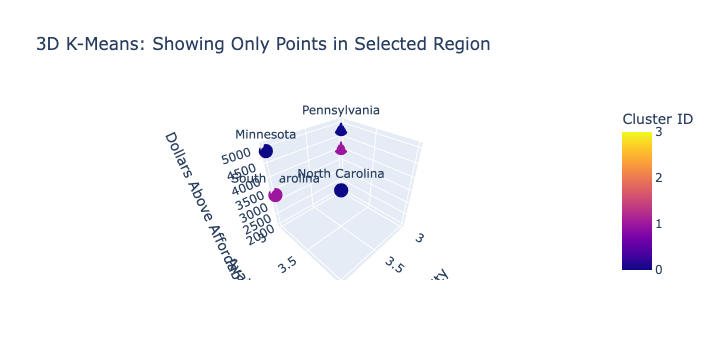

In [140]:
# Define the Bounding Box and Apply the Mask
x_bounds = [2.5, 9.5]
y_bounds = [2.5, 9.5]
z_bounds = [0, 5500]

# Create the boolean mask using your DataFrame columns
mask = (df_3d['Quality'] >= x_bounds[0]) & (df_3d['Quality'] <= x_bounds[1]) & \
       (df_3d['Availability'] >= y_bounds[0]) & (df_3d['Availability'] <= y_bounds[1]) & \
       (df_3d['Dollars Above Affordability'] >= z_bounds[0]) & (df_3d['Dollars Above Affordability'] <= z_bounds[1])

# Filter the DataFrame to Keep Only Points INSIDE the Region
# This is the key step. We create a new DataFrame from the mask.
df_in_region = df_3d[mask].copy() # .copy() is used to avoid a SettingWithCopyWarning

# Display the change in size
print(f"Points in original DataFrame: {len(df_3d)}")
print(f"Points after filtering for region: {len(df_in_region)}")

# Visualize Only the Points from the Selected Region
# Notice the first argument is now our new, filtered DataFrame.
fig = px.scatter_3d(
    df_in_region, # <-- We are using the filtered data here
    x='Quality',
    y='Availability',
    z='Dollars Above Affordability',
    color='cluster',
    text='State_Name',
    hover_name='State_Name',
    title="3D K-Means: Showing Only Points in Selected Region",
    labels={'cluster': 'Cluster ID'}
)

fig.update_traces(textposition='top center')
fig.show()

Points in original DataFrame: 50
Points after filtering for region: 3


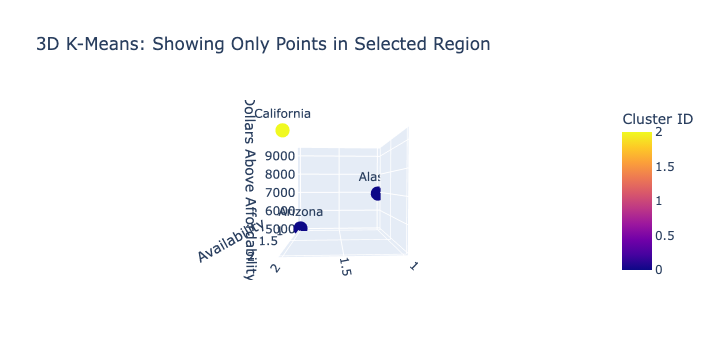

In [122]:
# Define the Bounding Box and Apply the Mask
x_bounds = [1, 2.4]
y_bounds = [1, 2.4]
z_bounds = [5000, 9500]

# Create the boolean mask using your DataFrame columns
mask = (df_3d['Quality'] >= x_bounds[0]) & (df_3d['Quality'] <= x_bounds[1]) & \
       (df_3d['Availability'] >= y_bounds[0]) & (df_3d['Availability'] <= y_bounds[1]) & \
       (df_3d['Dollars Above Affordability'] >= z_bounds[0]) & (df_3d['Dollars Above Affordability'] <= z_bounds[1])

# Filter the DataFrame to Keep Only Points INSIDE the Region
# This is the key step. We create a new DataFrame from the mask.
df_in_region = df_3d[mask].copy() # .copy() is used to avoid a SettingWithCopyWarning

# Display the change in size
print(f"Points in original DataFrame: {len(df_3d)}")
print(f"Points after filtering for region: {len(df_in_region)}")

# Visualize Only the Points from the Selected Region
# Notice the first argument is now our new, filtered DataFrame.
fig = px.scatter_3d(
    df_in_region, # <-- We are using the filtered data here
    x='Quality',
    y='Availability',
    z='Dollars Above Affordability',
    color='cluster',
    text='State_Name',
    hover_name='State_Name',
    title="3D K-Means: Showing Only Points in Selected Region",
    labels={'cluster': 'Cluster ID'}
)

fig.update_traces(textposition='top center')
fig.show()
